In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"/kaggle/input/drug-classification/drug200.csv")
df.shape

(200, 6)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
124,53,F,HIGH,NORMAL,12.495,drugB
18,23,M,LOW,HIGH,7.298,drugC
83,38,F,HIGH,NORMAL,11.326,drugA
188,65,M,HIGH,NORMAL,34.997,DrugY
138,51,M,HIGH,NORMAL,11.343,drugB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.describe(include="O")

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [10]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Drug', ylabel='count'>

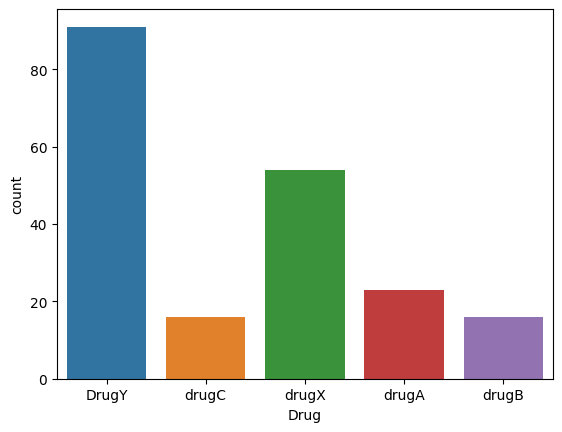

In [15]:
sns.countplot(x=df['Drug'])

/tmp/ipykernel_30/1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

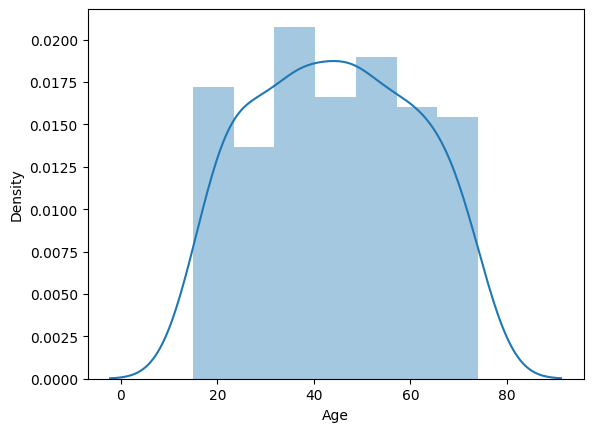

In [16]:
sns.distplot(df.Age)

<Axes: xlabel='Sex', ylabel='count'>

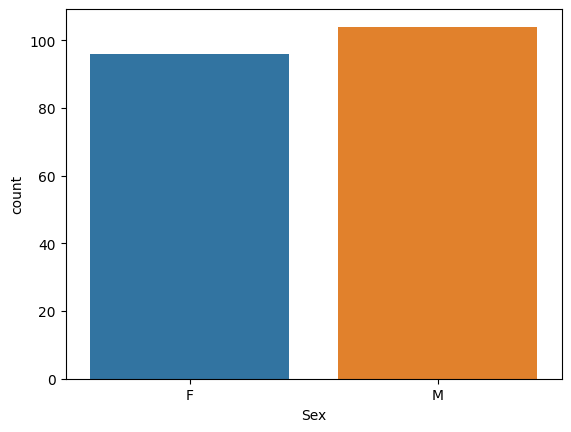

In [17]:
sns.countplot(x = df.Sex)

Text(0.5, 1.0, 'Sex Vs Drug')

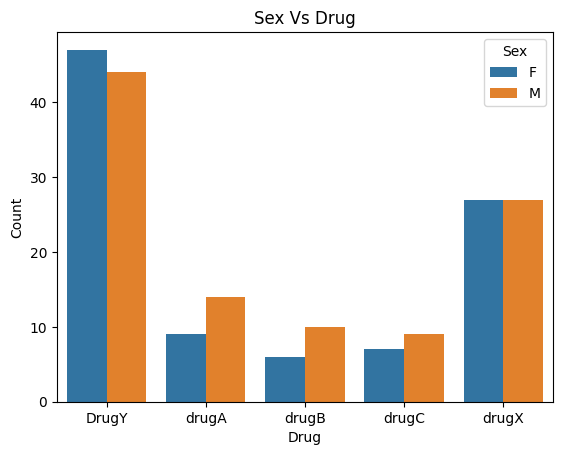

In [22]:
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count"))
plt.title("Sex Vs Drug")

Text(0.5, 1.0, 'BP Vs Drug')

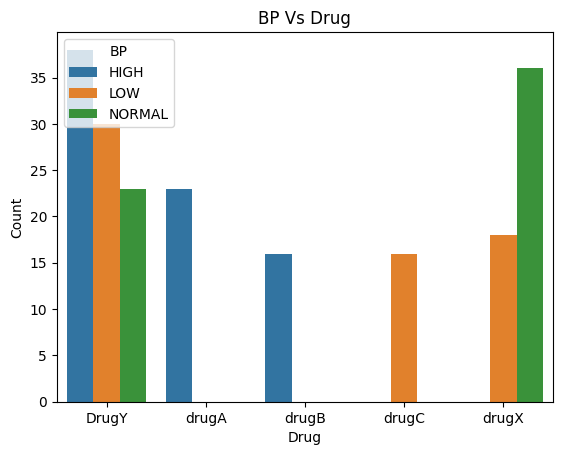

In [24]:
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df.groupby(["Drug","BP"]).size().reset_index(name = "Count"))
plt.title("BP Vs Drug")

Text(0.5, 1.0, 'Cholesterol Vs Drug')

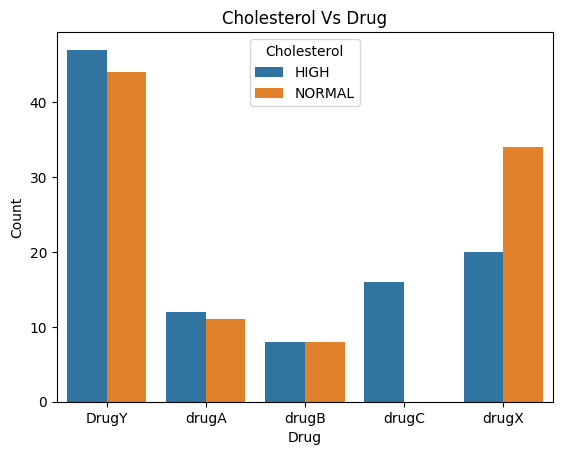

In [25]:
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count"))
plt.title("Cholesterol Vs Drug")

In [26]:
cat = [i for i in df.columns if df[i].dtypes == 'O']
cat

['Sex', 'BP', 'Cholesterol', 'Drug']

In [28]:
from sklearn.preprocessing import LabelEncoder
for l in cat:
    le = LabelEncoder()
    df[l] = le.fit_transform(df[l])

In [29]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


X=df.drop(columns='Drug')
y=df['Drug']

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGB Classifier" :XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)

    print(f"{name}:")
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print()

Logistic Regression:
Accuracy Score:  0.9166666666666666

Decision Tree:
Accuracy Score:  0.9666666666666667

Gradient Boosting Classifier:
Accuracy Score:  0.9833333333333333

XGB Classifier:
Accuracy Score:  0.9666666666666667

K-Nearest Neighbors:
Accuracy Score:  0.8666666666666667

Random Forest Classifier:
Accuracy Score:  0.9833333333333333

Ada Boost Classifier:
Accuracy Score:  0.5833333333333334

